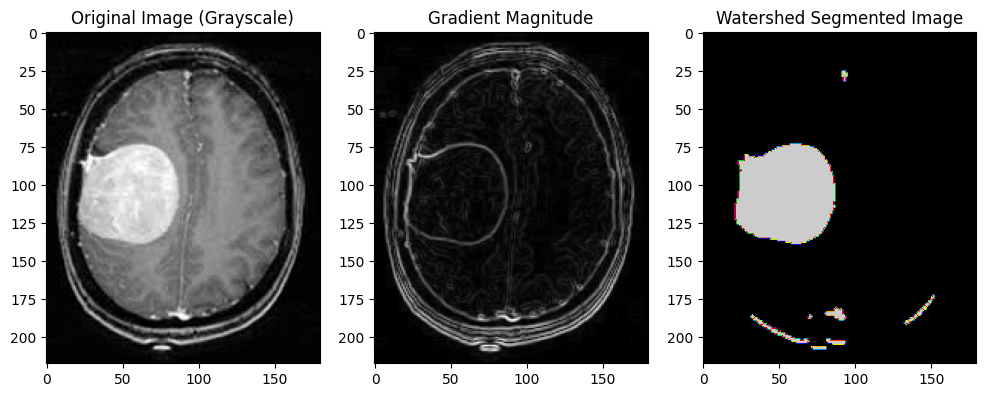

In [1]:
# Brain MRI image segmentation using Watershed Algorithm
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the brain image and convert to grayscale
image = cv2.imread('/content/brain3.png') # Load the image from a file
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Compute gradient magnitude (using Sobel operators to get the edge strength)
def compute_gradient(img):
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    return gradient_magnitude

# Step 2: Define markers (using a simple threshold to identify potential regions)
def define_markers(img, threshold=100):
    markers = np.zeros_like(img, dtype=np.int32)

    # Simple thresholding to identify initial markers
    markers[img < threshold] = 1  # Background marker
    markers[img > threshold * 2] = 2  # Foreground marker (tissue region)

    return markers

# Step 3: Implement Watershed algorithm by region growing from markers
def watershed_algorithm(img, markers):
    height, width = img.shape
    segmented = markers.copy()  # Copy of markers to fill with region labels
    gradient = compute_gradient(img)  # Gradient image for edge guidance

    # Create a list of pixel coordinates to process, starting with the markers
    # Pixels are sorted based on their gradient magnitude
    pixel_list = [(i, j) for i in range(height) for j in range(width) if segmented[i, j] > 0]
    pixel_list = sorted(pixel_list, key=lambda p: gradient[p[0], p[1]])

    # Dictionary to track neighboring pixels for region growing
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Perform region growing from the markers
    while pixel_list:
        x, y = pixel_list.pop(0)

        # If current pixel is part of a labeled region, continue growing
        if segmented[x, y] > 0:
            for dx, dy in neighbors:
                nx, ny = x + dx, y + dy
                # Check if within bounds and unlabeled
                if 0 <= nx < height and 0 <= ny < width and segmented[nx, ny] == 0:
                    # Assign region label of current pixel to the neighboring pixel
                    segmented[nx, ny] = segmented[x, y]
                    # Add this neighboring pixel to the list to continue growing the region
                    pixel_list.append((nx, ny))
                    # Sort by gradient again to ensure lowest gradient pixels are processed first
                    pixel_list = sorted(pixel_list, key=lambda p: gradient[p[0], p[1]])

    return segmented

# Step 4: Visualize results
# Calculate gradient magnitude
gradient = compute_gradient(gray_image)

# Define markers based on thresholded regions
markers = define_markers(gray_image)

# Apply the custom Watershed algorithm
segmented_image = watershed_algorithm(gray_image, markers)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image (Grayscale)")
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Gradient Magnitude")
plt.imshow(gradient, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Watershed Segmented Image")
plt.imshow(segmented_image, cmap='nipy_spectral') # Display Segmentation with color map
plt.show()
